<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/week5/week5_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 5


In [16]:
# Langkah 1: Import Library yang Diperlukan
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [17]:
# Langkah 1: Mengunduh Dataset dari GitHub
!wget https://github.com/farrelrassya/teachingMLDL/raw/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/dataset.zip


--2025-04-11 14:44:02--  https://github.com/farrelrassya/teachingMLDL/raw/main/02.%20Deep%20Learning/04.%20Week%204/Dataset/dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-11 14:44:03 ERROR 404: Not Found.



In [18]:
# Mengekstrak file ZIP yang diunduh
!unzip dataset.zip -d /content/dataset

unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


In [19]:
from google.colab import files
uploaded = files.upload()


Saving ReviewTokoBaju.csv to ReviewTokoBaju.csv


In [20]:
data = pd.read_csv('/content/ReviewTokoBaju.csv')  # Menggunakan path yang benar
print(data.head())


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [21]:
# Langkah 1: Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['Unnamed: 0'])


In [22]:
# Cara yang lebih aman untuk mengganti nilai pada kolom 'Title'
data['Title'] = data['Title'].fillna('No Title')  # Mengganti nilai kosong dengan 'No Title'


In [23]:
# Langkah 3: Menghapus baris yang memiliki nilai 'NaN' pada kolom Review Text
data.dropna(subset=['Review Text'], inplace=True)

In [24]:
# Langkah 4: Memilih fitur yang relevan untuk model
X = data[['Age', 'Review Text']]  # Menggunakan 'Age' dan 'Review Text' sebagai fitur
y = data['Rating']  # 'Rating' sebagai target


In [25]:
# Langkah 5: Mengubah teks menjadi angka (vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Menggunakan TF-IDF untuk 'Review Text'


In [26]:
X_text = vectorizer.fit_transform(X['Review Text'])  # Mengubah teks menjadi fitur numerik
import numpy as np
X = np.hstack([X[['Age']].values, X_text.toarray()])  # Menggabungkan fitur 'Age' dengan representasi teks


In [27]:
# Langkah 6: Membagi data menjadi training dan testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:

# Langkah 7: Normalisasi Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Cek beberapa baris pertama data yang sudah diproses
print(X_train[:5], y_train[:5])

[[-0.50826088 -0.05976269 -0.04741851 ... -0.02254914 -0.01778515
  -0.01806886]
 [ 0.87080976 -0.05976269 -0.04741851 ... -0.02254914 -0.01778515
  -0.01806886]
 [ 2.006515   -0.05976269 -0.04741851 ... -0.02254914 -0.01778515
  -0.01806886]
 [-0.99499169 -0.05976269 -0.04741851 ... -0.02254914 -0.01778515
  -0.01806886]
 [-0.50826088 -0.05976269 -0.04741851 ... -0.02254914 -0.01778515
  -0.01806886]] 11811    4
8171     5
22106    5
7473     2
19698    5
Name: Rating, dtype: int64


In [30]:
# Langkah 2: Mengonversi Rating menjadi Kategori
# Misalnya kita mengonversi Rating menjadi 3 kategori: 1-2 (Rendah), 3 (Sedang), 4-5 (Tinggi)
data['Rating_Category'] = data['Rating'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))


In [31]:
# Fitur dan Target
X = data[['Age', 'Review Text']]  # Menggunakan 'Age' dan 'Review Text' sebagai fitur
y = data['Rating_Category']  # Kategori Rating sebagai target


In [32]:
# Menggunakan TF-IDF untuk 'Review Text'
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = vectorizer.fit_transform(X['Review Text'])

In [33]:
import numpy as np
X = np.hstack([X[['Age']].values, X_text.toarray()])  # Gabungkan 'Age' dengan TF-IDF


In [34]:
# Langkah 3: Membagi data menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Langkah 4: Normalisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch [1/10], Loss: 1.1594, Accuracy: 0.1238
Epoch [2/10], Loss: 1.1036, Accuracy: 0.2871
Epoch [3/10], Loss: 1.0551, Accuracy: 0.5811
Epoch [4/10], Loss: 1.0112, Accuracy: 0.7619
Epoch [5/10], Loss: 0.9701, Accuracy: 0.8296
Epoch [6/10], Loss: 0.9303, Accuracy: 0.8536
Epoch [7/10], Loss: 0.8912, Accuracy: 0.8637
Epoch [8/10], Loss: 0.8521, Accuracy: 0.8682
Epoch [9/10], Loss: 0.8129, Accuracy: 0.8717
Epoch [10/10], Loss: 0.7734, Accuracy: 0.8738
Accuracy: 0.7860, Precision: 0.7293, Recall: 0.7860, F1-Score: 0.7371
AUC: 0.7826


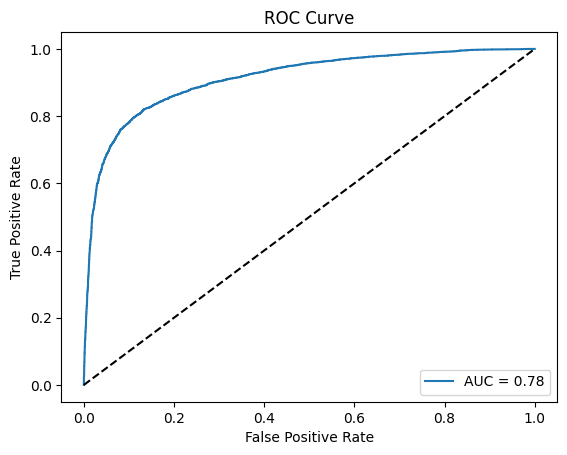

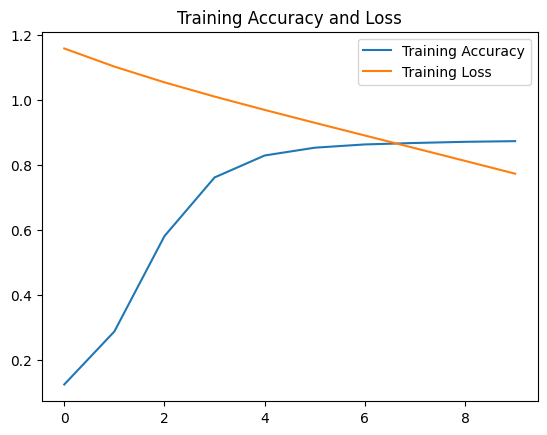

In [36]:

# Membuat model deep learning menggunakan PyTorch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)  # 3 kelas untuk klasifikasi

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Inisialisasi model, loss function, dan optimizer
model_pytorch = Net()
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss untuk klasifikasi
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.001)

# Mengonversi data menjadi tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Melatih model
epochs = 10  # Set jumlah epoch sesuai instruksi
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model_pytorch.train()
    optimizer.zero_grad()
    outputs = model_pytorch(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Menghitung akurasi selama pelatihan
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    if epoch % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluasi Model dengan Akurasi, Presisi, Recall, F1-Score, AUC, ROC
model_pytorch.eval()
with torch.no_grad():
    outputs = model_pytorch(X_test_tensor)
    probabilities = torch.softmax(outputs, dim=1).numpy()  # Probabilitas per kelas
    _, predicted = torch.max(outputs, 1)
    y_pred_test = predicted.numpy()

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

    # Binarize the labels for ROC and AUC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Mengubah target menjadi format One-vs-Rest

    # Pastikan y_test_bin dan y_pred_test memiliki jumlah data yang sama
    if len(y_test_bin) != len(probabilities):
        print(f"Warning: Mismatch between number of samples in y_test_bin ({len(y_test_bin)}) and y_pred_test ({len(probabilities)})")

    # Menghitung ROC Curve dan AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probabilities.ravel())
    roc_auc = roc_auc_score(y_test_bin, probabilities)
    print(f'AUC: {roc_auc:.4f}')

    # Visualisasi ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Visualisasi Akurasi dan Loss
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_losses, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')
plt.show()

Epoch [1/10], Loss: 1.1333, Accuracy: 0.2822
Epoch [2/10], Loss: 1.1078, Accuracy: 0.3392
Epoch [3/10], Loss: 1.0832, Accuracy: 0.3995
Epoch [4/10], Loss: 1.0591, Accuracy: 0.4634
Epoch [5/10], Loss: 1.0354, Accuracy: 0.5255
Epoch [6/10], Loss: 1.0120, Accuracy: 0.5839
Epoch [7/10], Loss: 0.9889, Accuracy: 0.6395
Epoch [8/10], Loss: 0.9659, Accuracy: 0.6872
Epoch [9/10], Loss: 0.9431, Accuracy: 0.7316
Epoch [10/10], Loss: 0.9204, Accuracy: 0.7686
Accuracy: 0.5059, Precision: 0.6597, Recall: 0.5059, F1-Score: 0.5603
AUC: 0.5830


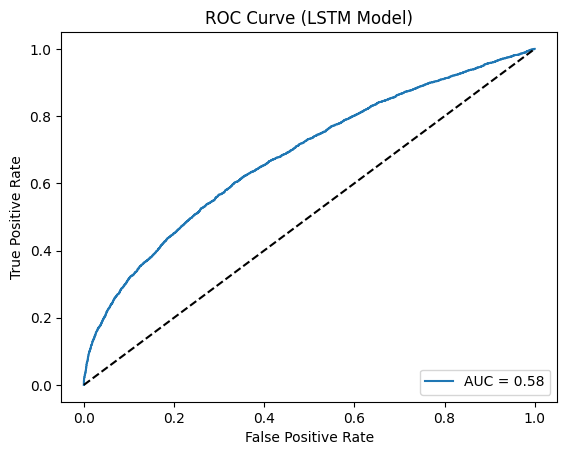

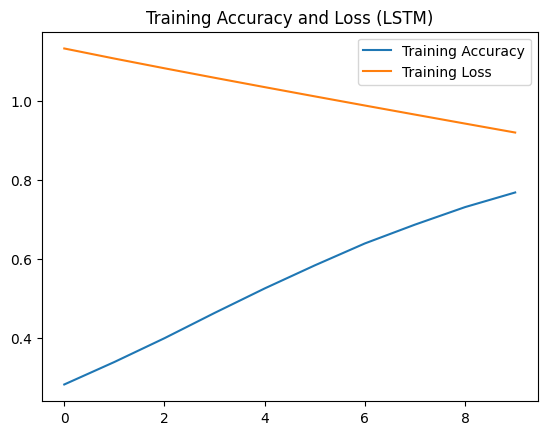

In [37]:
# Membuat model LSTM untuk klasifikasi multikelas
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # LSTM membutuhkan dimensi (batch_size, seq_len, input_size)
        # Menggunakan seq_len = 1 karena kita hanya memiliki satu fitur per contoh
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])  # Mengambil output terakhir
        return x

# Misalkan X_train sudah dalam bentuk sekuensial untuk input LSTM
# Sesuaikan dimensi input LSTM dengan data Anda (dimensi X_train)
input_size = X_train.shape[1]  # Jumlah fitur
hidden_size = 64  # Ukuran hidden state
num_classes = 3  # Jumlah kelas

# Reshape data agar cocok dengan LSTM: (batch_size, seq_len, input_size)
X_train_tensor_lstm = X_train_tensor.unsqueeze(1)  # Menambah dimensi untuk seq_len (menjadi (batch_size, 1, input_size))
X_test_tensor_lstm = X_test_tensor.unsqueeze(1)  # Menambah dimensi untuk seq_len (menjadi (batch_size, 1, input_size))

# Inisialisasi model LSTM
model_lstm = LSTMNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss untuk klasifikasi
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

# Melatih model LSTM
epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model_lstm.train()
    optimizer.zero_grad()
    outputs = model_lstm(X_train_tensor_lstm)  # Perhatikan bahwa data sudah dalam bentuk tensor yang cocok untuk LSTM
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Menghitung akurasi selama pelatihan
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    if epoch % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluasi Model dengan Akurasi, Presisi, Recall, F1-Score, AUC, ROC
model_lstm.eval()
with torch.no_grad():
    outputs = model_lstm(X_test_tensor_lstm)
    probabilities = torch.softmax(outputs, dim=1).numpy()  # Probabilitas per kelas
    _, predicted = torch.max(outputs, 1)
    y_pred_test = predicted.numpy()

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

    # Binarize the labels for ROC and AUC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Mengubah target menjadi format One-vs-Rest
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probabilities.ravel())
    roc_auc = roc_auc_score(y_test_bin, probabilities)
    print(f'AUC: {roc_auc:.4f}')

    # Visualisasi ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (LSTM Model)')
    plt.legend(loc='lower right')
    plt.show()

# Visualisasi Akurasi dan Loss
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_losses, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss (LSTM)')
plt.show()

Epoch [1/10], Loss: 1.1242, Accuracy: 0.3243
Epoch [2/10], Loss: 0.9629, Accuracy: 0.6466
Epoch [3/10], Loss: 0.8186, Accuracy: 0.8277
Epoch [4/10], Loss: 0.6875, Accuracy: 0.9008
Epoch [5/10], Loss: 0.5716, Accuracy: 0.9273
Epoch [6/10], Loss: 0.4723, Accuracy: 0.9411
Epoch [7/10], Loss: 0.3896, Accuracy: 0.9505
Epoch [8/10], Loss: 0.3221, Accuracy: 0.9561
Epoch [9/10], Loss: 0.2679, Accuracy: 0.9597
Epoch [10/10], Loss: 0.2249, Accuracy: 0.9633
Accuracy: 0.7589, Precision: 0.7574, Recall: 0.7589, F1-Score: 0.7573
AUC: 0.8310


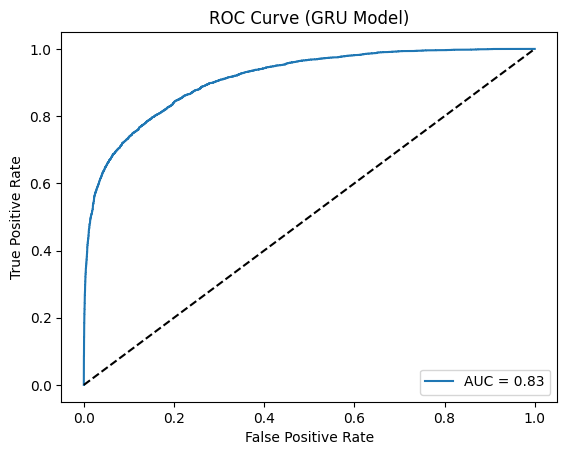

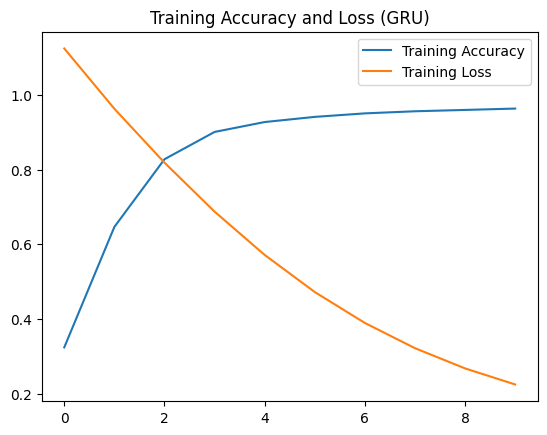

In [39]:
# Membuat model GRU untuk klasifikasi multikelas
class GRUNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(GRUNet, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # GRU membutuhkan dimensi (batch_size, seq_len, input_size)
        # Menggunakan seq_len = 1 karena kita hanya memiliki satu fitur per contoh
        x, _ = self.gru(x)
        x = self.fc(x[:, -1, :])  # Mengambil output terakhir
        return x

# Inisialisasi model GRU
model_gru = GRUNet(input_size, hidden_size, num_classes)
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

# Melatih model GRU
epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model_gru.train()
    optimizer.zero_grad()
    outputs = model_gru(X_train_tensor_lstm)  # Menggunakan data yang sudah direshape untuk GRU
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Menghitung akurasi selama pelatihan
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    if epoch % 1 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluasi Model dengan Akurasi, Presisi, Recall, F1-Score, AUC, ROC
model_gru.eval()
with torch.no_grad():
    outputs = model_gru(X_test_tensor_lstm)
    probabilities = torch.softmax(outputs, dim=1).numpy()  # Probabilitas per kelas
    _, predicted = torch.max(outputs, 1)
    y_pred_test = predicted.numpy()

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

    # Binarize the labels for ROC and AUC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Mengubah target menjadi format One-vs-Rest
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probabilities.ravel())
    roc_auc = roc_auc_score(y_test_bin, probabilities)
    print(f'AUC: {roc_auc:.4f}')

    # Visualisasi ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (GRU Model)')
    plt.legend(loc='lower right')
    plt.show()

# Visualisasi Akurasi dan Loss
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_losses, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss (GRU)')
plt.show()


Epoch [1/20], Loss: 1.1471, Accuracy: 0.3465
Epoch [6/20], Loss: 0.7454, Accuracy: 0.7716
Epoch [11/20], Loss: 0.5070, Accuracy: 0.8866
Epoch [16/20], Loss: 0.3408, Accuracy: 0.9384
Accuracy: 0.6538, Precision: 0.7736, Recall: 0.6538, F1-Score: 0.6961
AUC: 0.8030


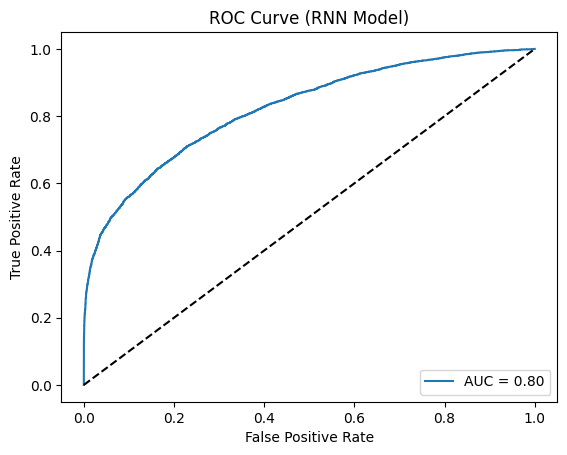

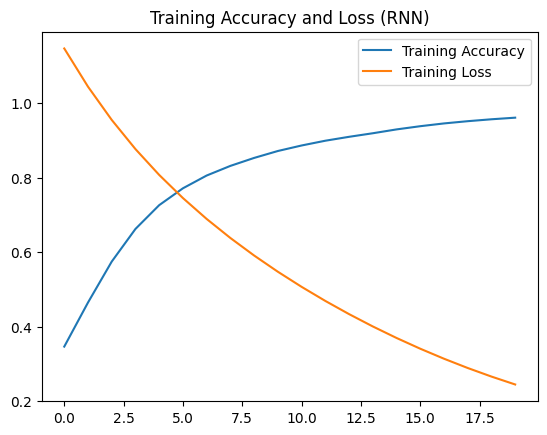

In [40]:
# Membuat model RNN untuk klasifikasi multikelas
class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNNNet, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # RNN membutuhkan dimensi (batch_size, seq_len, input_size)
        # Menggunakan seq_len = 1 karena kita hanya memiliki satu fitur per contoh
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])  # Mengambil output terakhir
        return x

# Hyperparameters
hidden_size = 512 # Menambah ukuran hidden layer
epochs = 20  # Menambah jumlah epoch
learning_rate = 0.0005  # Menurunkan learning rate untuk stabilitas pelatihan

# Inisialisasi model RNN
model_rnn = RNNNet(input_size, hidden_size, num_classes)
optimizer = optim.Adam(model_rnn.parameters(), lr=learning_rate)

# Melatih model RNN
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model_rnn.train()
    optimizer.zero_grad()
    outputs = model_rnn(X_train_tensor_lstm)  # Menggunakan data yang sudah direshape untuk RNN
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Menghitung akurasi selama pelatihan
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    if epoch % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluasi Model RNN
model_rnn.eval()
with torch.no_grad():
    outputs = model_rnn(X_test_tensor_lstm)
    probabilities = torch.softmax(outputs, dim=1).numpy()  # Probabilitas per kelas
    _, predicted = torch.max(outputs, 1)
    y_pred_test = predicted.numpy()

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

    # Binarize the labels for ROC and AUC
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Mengubah target menjadi format One-vs-Rest
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probabilities.ravel())
    roc_auc = roc_auc_score(y_test_bin, probabilities)
    print(f'AUC: {roc_auc:.4f}')

    # Visualisasi ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (RNN Model)')
    plt.legend(loc='lower right')
    plt.show()

# Visualisasi Akurasi dan Loss
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_losses, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss (RNN)')
plt.show()


**Penjelasan terkait persamaan matematika yang ada dalam model RNN, LSTM, dan GRU**


1. RNN (Recurrent Neural Network)
Persamaan utama:

ℎ
𝑡
=
𝜎
(
𝑊
⋅
𝑥
𝑡
+
𝑈
⋅
ℎ
𝑡
−
1
+
𝑏
)
h
t
​
 =σ(W⋅x
t
​
 +U⋅h
t−1
​
 +b)
ℎ
𝑡
h
t
​
 : Status tersembunyi (memori model) pada waktu t.

𝑥
𝑡
x
t
​
 : Input pada waktu t.

ℎ
𝑡
−
1
h
t−1
​
 : Status tersembunyi pada waktu sebelumnya (t-1).

𝑊
,
𝑈
W,U: Matriks bobot.

𝜎
σ: Fungsi aktivasi, biasanya tanh atau ReLU.

Inti: RNN memperbarui hidden state berdasarkan input saat ini dan hidden state sebelumnya. Model ini sangat sederhana tetapi kesulitan menangani urutan panjang karena masalah vanishing gradient.


2. LSTM (Long Short-Term Memory)
Persamaan utama:

Forget Gate:

𝑓
𝑡
=
𝜎
(
𝑊
𝑓
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑓
)
f
t
​
 =σ(W
f
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
f
​
 )
Input Gate:

𝑖
𝑡
=
𝜎
(
𝑊
𝑖
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑖
)
i
t
​
 =σ(W
i
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
i
​
 )
Cell State Update:

𝐶
𝑡
~
=
tanh
⁡
(
𝑊
𝐶
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝐶
)
C
t
​

~
​
 =tanh(W
C
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
C
​
 )
Final Cell State:

𝐶
𝑡
=
𝑓
𝑡
∗
𝐶
𝑡
−
1
+
𝑖
𝑡
∗
𝐶
𝑡
~
C
t
​
 =f
t
​
 ∗C
t−1
​
 +i
t
​
 ∗
C
t
​

~
​

Output Gate:

𝑜
𝑡
=
𝜎
(
𝑊
𝑜
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑜
)
o
t
​
 =σ(W
o
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
o
​
 )
Hidden State:

ℎ
𝑡
=
𝑜
𝑡
∗
tanh
⁡
(
𝐶
𝑡
)
h
t
​
 =o
t
​
 ∗tanh(C
t
​
 )
Inti: LSTM memiliki tiga gate utama (Forget, Input, Output) dan cell state untuk mengingat informasi jangka panjang. Ini mengatasi masalah vanishing gradient yang ada pada RNN.

3. GRU (Gated Recurrent Unit)
Persamaan utama:

Update Gate:

𝑧
𝑡
=
𝜎
(
𝑊
𝑧
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑧
)
z
t
​
 =σ(W
z
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
z
​
 )
Reset Gate:

𝑟
𝑡
=
𝜎
(
𝑊
𝑟
⋅
[
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
𝑟
)
r
t
​
 =σ(W
r
​
 ⋅[h
t−1
​
 ,x
t
​
 ]+b
r
​
 )
Candidate Hidden State:

ℎ
𝑡
~
=
tanh
⁡
(
𝑊
ℎ
⋅
[
𝑟
𝑡
∗
ℎ
𝑡
−
1
,
𝑥
𝑡
]
+
𝑏
ℎ
)
h
t
​

~
​
 =tanh(W
h
​
 ⋅[r
t
​
 ∗h
t−1
​
 ,x
t
​
 ]+b
h
​
 )
Final Hidden State:

ℎ
𝑡
=
(
1
−
𝑧
𝑡
)
∗
ℎ
𝑡
−
1
+
𝑧
𝑡
∗
ℎ
𝑡
~
h
t
​
 =(1−z
t
​
 )∗h
t−1
​
 +z
t
​
 ∗
h
t
​

~
​

Inti: GRU menggabungkan beberapa komponen dari LSTM menjadi dua gate (Update dan Reset). GRU lebih sederhana dan lebih cepat dibandingkan LSTM, namun tetap efektif dalam menangani urutan panjang.


